# $k$-Nearest Neighbors

In this notebook we'll introduce our first classification algorithm, $k$-nearest neighbors.

## What You'll Accomplish

- We'll see our first classification example,
- You'll work through a simple algorithm, $k$-nearest neighbors,
- We'll introduce our first classification performance measure, accuracy.

Let's go!

In [1]:
## Load the packages we'll need

## to get the iris data
from sklearn.datasets import load_iris

## for data handling 
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
## Load the data
iris = load_iris()
iris_df = pd.DataFrame(iris['data'],columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['iris_class'] = iris['target']

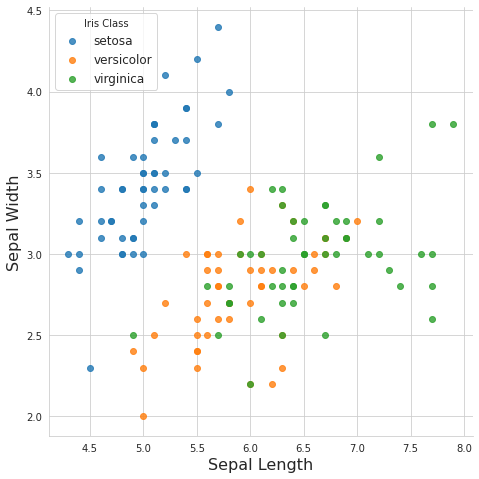

In [3]:
## This chunk of code is going to plot the data
sns.lmplot(data = iris_df, x = 'sepal_length', 
            y = 'sepal_width',hue = 'iris_class',fit_reg=False,
            height = 6.5,legend=False)

plt.legend(title='Iris Class', loc='upper left', 
           labels=['setosa', 'versicolor', 'virginica'], 
           fontsize = 12)
plt.xlabel("Sepal Length",fontsize = 16)
plt.ylabel("Sepal Width",fontsize = 16)

plt.show()

Since our iris data has three distinct classes, we can imagine a world in which we'd want to build a model that takes in `petal_width`, `petal_length`, `sepal_width`, and `sepal_length` then predicts what kind of iris we have.

People build entire business models around classification problems. For example, <a href="https://www.covermymeds.com/main/">CoverMyMeds</a> started by solving the problem "How can I predict whether or not my prescription will need a prior authorization form?". <a href="https://www.upstart.com/">Upstart</a> tries to predict whether or not someone will be a good candidate for their loans.

These problems are ubiquitous in our every day lives. Now lets start learning how we can use supervised learning techniques to solve them.

## A Simple Algorithm

We'll now work through a classification problem with one of the simplest classification algorithms, $k$-nearest neighbors.

### KNN

$k$-nearest neighbors is quite straightforward. When you want to classify an unlabeled point, you find the $k$ closest other data points in the data space. Whichever class is most present among the $k$ neighbors is what the algorithm classifies the unlabeled point as. In the case of ties, the class is randomly assigned from the tied classes.

Let's look at a picture to see what we mean.

In [4]:
## Here is some random data
## to illustrate the knn concept
np.random.seed(440)
xs = np.random.randn(50,2)
os = np.random.randn(50,2)-np.array([3,0])

unlabeled = [-1.2,0]

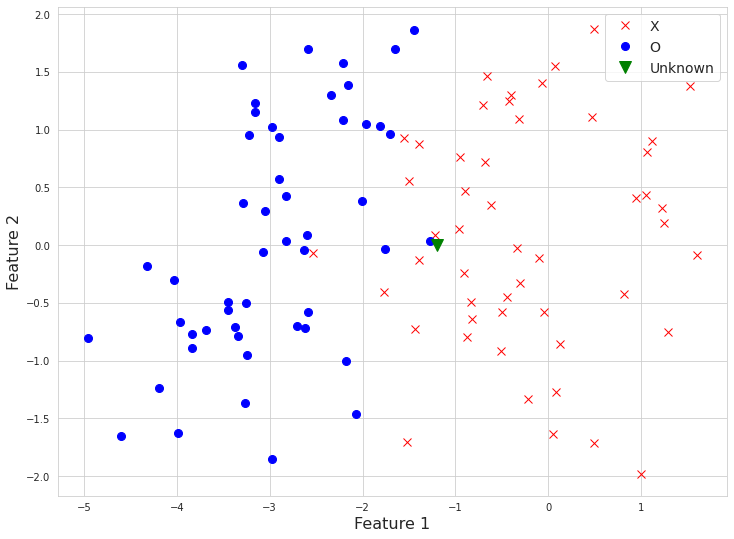

In [5]:
## We now plot that data
plt.figure(figsize = (12,9))

plt.plot(xs[:,0],xs[:,1],'rx',label = "X",markersize=8)
plt.plot(os[:,0],os[:,1],'bo',label = "O",markersize=8)
plt.plot(unlabeled[0],unlabeled[1],'gv',label = "Unknown",markersize=12)
plt.xlabel("Feature 1", fontsize = 16)
plt.ylabel("Feature 2", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

Looking at the plot above, how would would knn classify the unlabeled point for $k=1$, $k=5$, $k=10$?

### Stratified Train Test Splits

Before returning to our iris data set let's take a brief aside on training test splits for classification problems. Consider the following phony data.

In [6]:
X = np.random.randn(10,4)
y = np.zeros(10)
y[2] = 1
y[7] = 1

Now let's perform a train test split like we did in our regression notebooks.

In [7]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [9]:
# First input the features, then the target
# specify what fraction of your data you want to test
# then set a random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=111)

In [10]:
print(y_train)

[0. 0. 0. 0. 0. 0.]


In [11]:
print(y_test)

[1. 0. 0. 1.]


##### Notice anything?

This can be avoided by performing a <i>stratified train-test split</i>.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=111,
                                                    stratify=y)

In [25]:
print(y_train)

[2 0 2 0 0 0 1 2 1 2 2 0 2 0 0 0 1 1 1 0 0 2 0 2 2 1 2 1 1 2 2 0 2 0 2 1 1
 2 2 2 2 0 1 1 1 0 1 0 0 1 0 2 0 2 2 1 0 2 0 1 2 0 1 2 1 1 1 2 1 0 0 0 1 0
 1 2 0 1 1 2 1 0 1 0 2 1 2 2 0 1]


In [23]:
print(y_test)

[1 1 0 1 2 0 2 2 0 2 1 1 2 2 0 0 0 1 0 1 2 2 1 0 1 1 2 2 0 2 0 1 2 1 2 1 0
 0]


Stratified splits first separate the data according to class. Each class is then randomly separated in two. Let's illustrate this with a picture.

<img src="stratify.png" style="width:80%"></img>



Now our particular data set above was an extreme example, however this sort of thing can be an issue in a number of classification problems of interest where the desired class is a rare occurence. One such example would be detecting cases of credit card fraud.

### Building an iris classifier

We'll now demonstrate the flow of a classification problem, by using knn to build an iris classifier.


In [26]:
## We can turn the data in numpy arrays (for ease of data manipulation) 
## like so
X = iris_df[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()
y = iris_df['iris_class'].to_numpy()

In [27]:
## Let's try coding along!
## You write code for the train test split here
## I'll wait for a minute before typing the answer

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)

#### Fitting the Model

Now we can fit the model to our train data, let's use $k=3$.

In [28]:
## Just like with regression we'll import from
## sklearn
## import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

The docs for `KNeighborsClassifier` <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier">https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier</a>.

In [29]:
## Make the model
knn = KNeighborsClassifier(n_neighbors = 3)

In [30]:
## Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Performance Measures - Accuracy 

One way to measure how well our model did is to calculate its <i>accuracy</i>. Accuracy is the number of correct predictions divided by the number of total predictions we made. Let's see how well our model does, on our training set.

In [31]:
## Make a prediction on our train set
y_predict = knn.predict(X_train)

In [20]:
## We calculate the accuracy here
## sum a list of booleans and True gets cast as 1
## False gets cast as 0
print("Our model has a ",
      np.round(sum(y_predict == y_train)/len(y_train)*100,2),
      "% accuracy on the training set")

Our model has a  94.64 % accuracy on the training set


That's not too bad!

What could we do to the $k$-nearest neighbors model to change our accuracy? 

Also, is there anything else we could do to get a better idea of the generalization error? 

### Cross Validation for Model Assessment

Just as we did for some of our regression models we can assess multiple models at once and compare the average accuracies of them all to choose the best model.

### You Code

Implement CV with $5$ splits. Set a random state so you could recreate your split. Going from $1$ to $20$ neighbors find the model that has the best CV accuracy.

I'll get you set up with the cross validation using a new python function `StratifiedKFold`.

Remember finish as much as you can in our allotted time.

In [21]:
## import StratifiedKFold
## THIS IS NEW!!!
## This allows you to do stratified k fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [32]:
## Make a kfold model object, with a random_state
## Note that we use StratifiedKFold just like KFold
kfold = StratifiedKFold(5,shuffle = True,random_state = 440)

In [33]:
## You'll use this function for calculating the accuracy
## Just input the model, the input data and the target data
def get_acc(model,X,y):
    pred = model.predict(X)
    return np.sum(pred == y)/len(y)

In [ ]:
## You run 5 fold cross validation here

## Make an empty array to hold your cv accuracies here


## Loop through all the possible neighbors from 1 to max_neighbors
max_neighbors = 20


## Perform the cross validation loop here

In [ ]:
# Plot how the accuracy changes

plt.figure(figsize=(10,8))

## Plot the number of neighbors on the x
## plot the avg cross validation accuracy on the y
plt.plot()

## Use these as your axes labels
plt.xlabel("Number of Neighbors", fontsize=16)
plt.ylabel("Average CV Accuracy (%)", fontsize=16)

plt.show()

From the above plot it looks like the "best" model here is going to be which one? 

Let's go ahead and calculate accuracy on our test set using this best model. Do that below.

In [ ]:
# Write your code here




## That's it!

That's it for this notebook! Up next we'll review some of those other classification performance measures we mentioned in the Introduction notebook.

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2021.

Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)